<a href="https://colab.research.google.com/github/InesAlarcon/SeminarioProfesional/blob/master/Lab03_TextClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
tf.enable_eager_execution()

from tensorflow import keras

!pip install -q tensorflow-datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import numpy as np

print(tf.__version__)


1.15.0


In [0]:
(train_data, test_data), info = tfds.load(
    # Use the version pre-encoded with an ~8k vocabulary.
    'imdb_reviews/subwords8k', 
    # Return the train/test datasets as a tuple.
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    # Return (example, label) pairs from the dataset (instead of a dictionary).
    as_supervised=True,
    # Also return the `info` structure. 
    with_info=True)

In [0]:
encoder = info.features['text'].encoder

In [38]:
print ('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [39]:
for train_example, train_label in train_data.take(1):
  print('Encoded text:', train_example[:10].numpy())
  print('Label:', train_label.numpy())

Encoded text: [ 249    4  277  309  560    6 6639 4574    2   12]
Label: 1


In [40]:
encoder.decode(train_example)

"As a lifelong fan of Dickens, I have invariably been disappointed by adaptations of his novels.<br /><br />Although his works presented an extremely accurate re-telling of human life at every level in Victorian Britain, throughout them all was a pervasive thread of humour that could be both playful or sarcastic as the narrative dictated. In a way, he was a literary caricaturist and cartoonist. He could be serious and hilarious in the same sentence. He pricked pride, lampooned arrogance, celebrated modesty, and empathised with loneliness and poverty. It may be a cliché, but he was a people's writer.<br /><br />And it is the comedy that is so often missing from his interpretations. At the time of writing, Oliver Twist is being dramatised in serial form on BBC television. All of the misery and cruelty is their, but non of the humour, irony, and savage lampoonery. The result is just a dark, dismal experience: the story penned by a journalist rather than a novelist. It's not really Dickens

In [0]:
BUFFER_SIZE = 1000

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32, train_data.output_shapes))

test_batches = (
    test_data
    .padded_batch(32, train_data.output_shapes))

In [42]:
for example_batch, label_batch in train_batches.take(2):
  print("Batch shape:", example_batch.shape)
  print("label shape:", label_batch.shape)
  

Batch shape: (32, 951)
label shape: (32,)
Batch shape: (32, 748)
label shape: (32,)


In [43]:
model = keras.Sequential([
  keras.layers.Embedding(encoder.vocab_size, 16),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(1, activation='relu')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [45]:
history = model.fit(train_batches,
                    epochs=10,
                    validation_data=test_batches,
                    validation_steps=30)

Epoch 1/10
782/782 [==============================] - 13s 17ms/step - loss: 0.7325 - acc: 0.5750 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 2/10
782/782 [==============================] - 10s 13ms/step - loss: 0.6405 - acc: 0.7741 - val_loss: 0.6173 - val_acc: 0.7969
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 0.5587 - acc: 0.8098 - val_loss: 0.5307 - val_acc: 0.8292
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 0.4752 - acc: 0.8460 - val_loss: 0.4871 - val_acc: 0.8479
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 0.4118 - acc: 0.8696 - val_loss: 0.4485 - val_acc: 0.8604
Epoch 6/10
782/782 [==============================] - 10s 12ms/step - loss: 0.3649 - acc: 0.8824 - val_loss: 0.4216 - val_acc: 0.8656
Epoch 7/10
782/782 [==============================] - 10s 12ms/step - loss: 0.3328 - acc: 0.8894 - val_loss: 0.3975 - val_acc: 0.8771
Epoch 8/10
782/782 [==============================] - 

In [46]:
loss, accuracy = model.evaluate(test_batches)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 7s 9ms/step - loss: 0.4294 - acc: 0.8801
Loss:  0.4294352694926664
Accuracy:  0.88012


In [47]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Gráficas

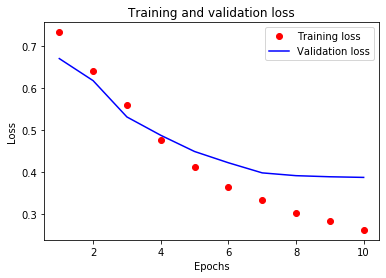

In [48]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

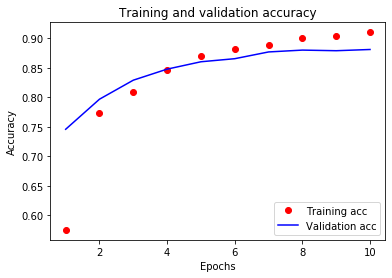

In [49]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

Testing

In [50]:
for train_example, train_label in train_data.take(50):
  print('Encoded text:', train_example[:10].numpy())
  print('Label:', train_label.numpy())

Encoded text: [ 249    4  277  309  560    6 6639 4574    2   12]
Label: 1
Encoded text: [2080 4956   90 7174    4 4669  190   25  162   15]
Label: 1
Encoded text: [  12  284   14   32   25 1975   49 7079   28   73]
Label: 1
Encoded text: [  62   18    4 4518 2920    5  966   27   13   12]
Label: 1
Encoded text: [  12   31   84  480   71    1  108 7748    9 1130]
Label: 1
Encoded text: [  62   18 3948 7974 6048  100   90   12  258   41]
Label: 1
Encoded text: [768  99 416   9 733   1 626   6 467 159]
Label: 0
Encoded text: [  12  604 1694 4406  797   14   27   72   12   18]
Label: 1
Encoded text: [ 133   67 1011    5 5225 7961 1482 2252  755    6]
Label: 1
Encoded text: [  62    9    1  107 5827 7961   32   12   31  160]
Label: 0
Encoded text: [  12  704  646    7   14   66    3   12  207 7968]
Label: 0
Encoded text: [2016  481  105  186  202   14   99  131  174 1331]
Label: 1
Encoded text: [5614 2785  266 4000 2979  102  707 3072 7961   20]
Label: 1
Encoded text: [3852 3121 7626 8026 

In [51]:
encoder.decode(train_example)

'This film really got off to a great start. It had the potential to turn into a really heartrending, romantic love story with cinematography that recorded the love between "Harlan" and Tobe in long, poetic and idyllic scenes. It really didn\'t need to be anything more than that, and for a moment there I became excited that someone was finally making a beautiful film for its own sake, another timeless classic, a modern myth perhaps. Why, oh why, then mess it up halfway through by making the lead character (Norton)another psycho? Maybe I\'m missing the point, but do we really need another film about psychos? Or is this need in Hollywood to portray the sick side of human nature indicative of a more general malaise in the movie industry? For a moment there, I was going to make a mental note of the director\'s name; now I\'m left feeling indifferent. At least it should be added in the film\'s defense that all the actors seemed to invest in their roles. Also, Evan Rachel Wood is really lovel